# Gun Violence Data in United States from 2013-2018
In this notebook we use the Gun Violence Data from the 
* [GunViolenceArchive](https://www.gunviolencearchive.org/)

Since this website has pages limitation on searching, I downloaded it
from 
* [Kaggle](https://www.kaggle.com/jameslko/gun-violence-data)

I'm really interested in some questions about gun violence in US:
 * Which state is the most violent city in the US?
 * Which city is the most violent city in the US?


In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [98]:
gvd_df = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')
gvd_df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

#### df.describe()

In [99]:
gvd_df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


#### print the array of columns and the index array

In [100]:
list(gvd_df.columns)

['incident_id',
 'date',
 'state',
 'city_or_county',
 'address',
 'n_killed',
 'n_injured',
 'incident_url',
 'source_url',
 'incident_url_fields_missing',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'sources',
 'state_house_district',
 'state_senate_district']

In [101]:
gvd_df.index

RangeIndex(start=0, stop=239677, step=1)

In [102]:
gvd_df = gvd_df[["date","state","city_or_county",'n_killed',
 'n_injured','incident_characteristics','participant_status']]
gvd_df = gvd_df.copy()

In [103]:
def date2year(date):
    ''' returns the year corresponding to a date'''
    date=str(date)
    year = int(date[:4])
    return year
print(date2year('2013-03-04'))

2013


In [104]:
gvd_df.iloc[30]

date                                                               2013-03-04
state                                                              California
city_or_county                                                      Los Banos
n_killed                                                                    1
n_injured                                                                   3
incident_characteristics    Shot - Wounded/Injured||Shot - Dead (murder, a...
participant_status          0::Injured||1::Injured||2::Injured||3::Killed|...
Name: 30, dtype: object

In [105]:
gvd_df['year'] = gvd_df['date'].apply(date2year)
gvd_df.columns
gvd_df.iloc[30]

date                                                               2013-03-04
state                                                              California
city_or_county                                                      Los Banos
n_killed                                                                    1
n_injured                                                                   3
incident_characteristics    Shot - Wounded/Injured||Shot - Dead (murder, a...
participant_status          0::Injured||1::Injured||2::Injured||3::Killed|...
year                                                                     2013
Name: 30, dtype: object

In [106]:
gvd_df['state'].unique()

array(['Pennsylvania', 'California', 'Ohio', 'Colorado', 'North Carolina',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Maryland', 'Tennessee',
       'Missouri', 'District of Columbia', 'Illinois', 'Delaware', 'Utah',
       'Michigan', 'Georgia', 'Indiana', 'Mississippi', 'New York',
       'Florida', 'Washington', 'South Carolina', 'Arizona', 'Kentucky',
       'New Jersey', 'Virginia', 'Wisconsin', 'Rhode Island', 'Texas',
       'Alabama', 'Kansas', 'Connecticut', 'West Virginia', 'Minnesota',
       'Nevada', 'Nebraska', 'Massachusetts', 'Hawaii', 'New Hampshire',
       'Iowa', 'Alaska', 'Arkansas', 'Idaho', 'Oregon', 'Wyoming',
       'Maine', 'North Dakota', 'Montana', 'Vermont', 'South Dakota'],
      dtype=object)

#### Groupby feature

In [107]:
city = gvd_df.groupby(['state','city_or_county'])
city = city['n_killed'].agg([sum, np.mean, np.max,len])
city = city.sort_values(ascending=False,by='sum')
city.head(40)

,,sum,mean,amax,len
state,city_or_county,,,,
Illinois,Chicago,2104,0.194563,4,10814
Texas,Houston,1144,0.461290,8,2480
Maryland,Baltimore,1055,0.267563,3,3943
Missouri,Saint Louis,916,0.366693,4,2498
Pennsylvania,Philadelphia,890,0.303858,3,2929
Louisiana,New Orleans,703,0.228990,3,3070
California,Los Angeles,636,0.596623,4,1066
Tennessee,Memphis,622,0.260906,3,2384
Indiana,Indianapolis,616,0.321001,4,1919


In [108]:
state = gvd_df.groupby(['state'])
state = state['n_killed'].agg([sum, np.mean, np.max,len])
state = state.sort_values(ascending=False,by='sum')
state.head(40)

,sum,mean,amax,len
state,,,,
California,5562,0.341101,16,16306
Texas,5046,0.371658,27,13577
Florida,3909,0.260097,50,15029
Illinois,3409,0.194179,6,17556
Ohio,2508,0.244826,8,10244
Georgia,2456,0.275182,6,8925
Pennsylvania,2395,0.268227,7,8929
North Carolina,2225,0.254606,4,8739
Louisiana,2179,0.268913,4,8103


In [109]:
ma_gvd_df = gvd_df[gvd_df['state'] == 'Massachusetts']
ma_plt_df = ma_gvd_df[['year','n_killed','n_injured']]
ma_year_df =  ma_plt_df.groupby(['year'])
ma_kill_df = ma_year_df['n_killed'].agg([sum])
ma_injure_df = ma_year_df['n_injured'].agg([sum])

In [110]:
ma_df = ma_kill_df
ma_df['n_killed'] = ma_df['sum']
ma_df['n_injured'] = ma_injure_df['sum']
ma_df = ma_df[['n_killed','n_injured']]
ma_df

,n_killed,n_injured
year,,
2014,101,315
2015,109,382
2016,112,468
2017,128,456
2018,22,80


#### Simple plot

(2014.0, 2018.0, 1.0, 500.0)

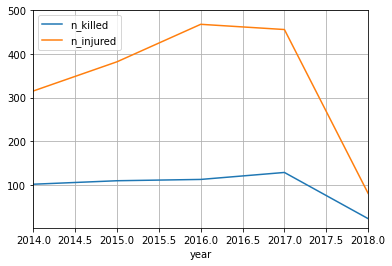

In [111]:
ma_df.plot()
plt.grid()
plt.axis([2014,2018,1,500])

#### Pivot table

In [ ]:
state_killed = gvd_df.groupby(['state','year'])['n_killed'].agg(sum)
state_killed = state_killed.reset_index(level=['state'])
state_killed


In [ ]:
state_pt =  pd.pivot_table(state_killed, values='n_killed', index=["year"], columns=["state"])
state_pt

#### Discussion
* The most violent state is California depending on the total gun shot related deaths;
* The most violent city is Chicago depending on the total gun shot related deaths.
* Overall gun violence cases is increasing year by year.